In [4]:
from keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

ModuleNotFoundError: No module named 'keras'

In [6]:
folder_mask = 'C:/Users/HP/OneDrive/Desktop/unet_images/mask'
folder_image = 'C:/Users/HP/OneDrive/Desktop/unet_images/image'

In [2]:
train_images = []

for directory_path in os.listdir(folder_image):
        img = Image.open(folder_image+'/'+directory_path)
        img = np.array(img)     
        train_images.append(img)
           
train_images = np.array(train_images)
train_images = train_images/255.0

#Capture mask/label info as a list
train_masks = [] 
for directory_path in os.listdir(folder_mask):
        mask = Image.open(folder_mask+'/'+directory_path)    
        mask = np.array(mask)   
        train_masks.append(mask)
        
#Convert list to array for machine learning processing        
train_masks = np.array(train_masks)
train_masks = train_masks/255.0

NameError: name 'os' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_images, train_masks, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
inputs = tf.keras.Input((128, 128, 3))

    # Contracting Path
s = inputs

    #Contraction path
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = Dropout(0.1)(c1)
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = MaxPooling2D((2, 2))(c1)
    
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = Dropout(0.1)(c2)
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = MaxPooling2D((2, 2))(c2)
     
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = Dropout(0.2)(c3)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = MaxPooling2D((2, 2))(c3)
     
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = Dropout(0.2)(c4)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    
#Expansive path     
     
u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c4)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = Dropout(0.2)(c7)
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = Dropout(0.1)(c8)
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = Dropout(0.1)(c9)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
outputs = Conv2D(3, (1, 1), activation='softmax')(c9)
     
model = Model(inputs=[inputs], outputs=[outputs])

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_165 (Conv2D)            (None, 128, 128, 16  448         ['input_12[0][0]']               
                                )                                                                 
                                                                                                  
 dropout_56 (Dropout)           (None, 128, 128, 16  0           ['conv2d_165[0][0]']             
                                )                                                          

 concatenate_33 (Concatenate)   (None, 32, 32, 128)  0           ['conv2d_transpose_33[0][0]',    
                                                                  'conv2d_170[0][0]']             
                                                                                                  
 conv2d_173 (Conv2D)            (None, 32, 32, 64)   73792       ['concatenate_33[0][0]']         
                                                                                                  
 dropout_60 (Dropout)           (None, 32, 32, 64)   0           ['conv2d_173[0][0]']             
                                                                                                  
 conv2d_174 (Conv2D)            (None, 32, 32, 64)   36928       ['dropout_60[0][0]']             
                                                                                                  
 conv2d_transpose_34 (Conv2DTra  (None, 64, 64, 32)  8224        ['conv2d_174[0][0]']             
 nspose)  

In [ ]:
history = model.fit(X_train, y_train, epochs=15, batch_size=15, validation_data=(X_test, y_test))

Epoch 1/15
6/6 [==============================] - 16s 2s/step - loss: 0.1310 - accuracy: 0.1135 - val_loss: 0.1251 - val_accuracy: 0.4728
Epoch 2/15
6/6 [==============================] - 8s 1s/step - loss: 0.1264 - accuracy: 0.4380 - val_loss: 0.1242 - val_accuracy: 0.7037
Epoch 3/15
6/6 [==============================] - 8s 1s/step - loss: 0.1253 - accuracy: 0.6152 - val_loss: 0.1237 - val_accuracy: 0.9869
Epoch 4/15
6/6 [==============================] - 8s 1s/step - loss: 0.1245 - accuracy: 0.8934 - val_loss: 0.1233 - val_accuracy: 0.9983
Epoch 5/15
6/6 [==============================] - 8s 1s/step - loss: 0.1236 - accuracy: 0.9690 - val_loss: 0.1234 - val_accuracy: 0.9994
Epoch 6/15
6/6 [==============================] - 8s 1s/step - loss: 0.1227 - accuracy: 0.9777 - val_loss: 0.1271 - val_accuracy: 0.9991
Epoch 7/15
6/6 [==============================] - 8s 1s/step - loss: 0.1221 - accuracy: 0.9797 - val_loss: 0.1265 - val_accuracy: 0.9970
Epoch 8/15
6/6 [========================

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img
from PIL import Image, ImageEnhance

In [ ]:
positive = 'C:/Users/HP/OneDrive/Desktop/vgg16_data/positive'
destination_directory_pos = 'C:/Users/HP/OneDrive/Desktop/vgg16_data/train_positive'
negative = 'C:/Users/HP/OneDrive/Desktop/vgg16_data/negative'
destination_directory_neg = 'C:/Users/HP/OneDrive/Desktop/vgg16_data/train_negative'
pos = []
neg = []
for i in os.listdir(positive):
    img = Image.open(positive+'/'+i)
    enhancer = ImageEnhance.Brightness(img)
    img_brightened = enhancer.enhance(0.7) 
    pos.append(img_brightened)

for i in os.listdir(negative):
    img = Image.open(negative+'/'+i)
    enhancer = ImageEnhance.Brightness(img)
    img_brightened = enhancer.enhance(0.7)
    neg.append(img_brightened)

for i in range(len(pos)):
    destination_path_pos = os.path.join(destination_directory_pos, str(i)+".png")
    pos[i].save(destination_path_pos)
for i in range(len(neg)):
    destination_path_neg = os.path.join(destination_directory_neg, str(i)+".png")
    neg[i].save(destination_path_neg)

In [ ]:
positive = 'C:/Users/HP/OneDrive/Desktop/vgg16_data/train_positive'
destination_directory_pos = 'C:/Users/HP/OneDrive/Desktop/vgg16_data/positive_1'
for i in os.listdir(positive):
    input_image = Image.open(positive+'/'+i)
    input_image = np.array(input_image)
    input_image = input_image/255.0
    input_image = np.expand_dims(input_image, axis=0)
    predictions = model.predict(input_image)
    predictions = predictions * 255.0
    predictions = predictions.astype(np.uint8)
    predicted_image = Image.fromarray(predictions[0])
    destination_path_pos = os.path.join(destination_directory_pos, str(i))
    predicted_image.save(destination_path_pos)

In [ ]:
negative = 'C:/Users/HP/OneDrive/Desktop/vgg16_data/train_negative'
destination_directory_neg = 'C:/Users/HP/OneDrive/Desktop/vgg16_data/negative_1'
for i in os.listdir(negative):
    input_image = Image.open(negative+'/'+i)
    input_image = np.array(input_image)
    input_image = input_image/255.0
    input_image = np.expand_dims(input_image, axis=0)
    predictions = model.predict(input_image)
    predictions = predictions * 255.0
    predictions = predictions.astype(np.uint8)
    predicted_image = Image.fromarray(predictions[0])
    destination_path_neg = os.path.join(destination_directory_neg, str(i))
    predicted_image.save(destination_path_neg)

In [ ]:
input_image = Image.open('C:/Users/HP/OneDrive/Desktop/44.png')
input_image = np.array(input_image)
input_image = input_image/255.0
input_image = np.expand_dims(input_image, axis=0)
predictions = model.predict(input_image)
predictions = predictions * 255.0
predictions = predictions.astype(np.uint8)
predicted_image = Image.fromarray(predictions[0])
predicted_image.show()

1/1 [==============================] - 0s 324ms/step


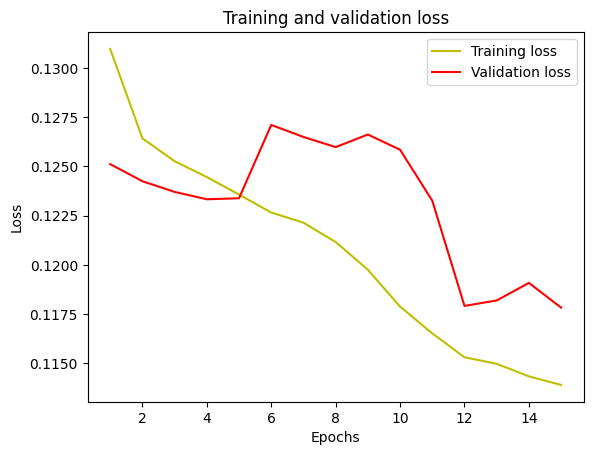

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


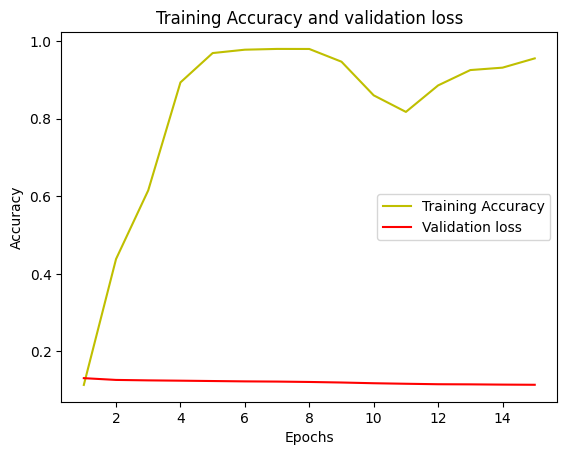

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, loss, 'r', label='Validation loss')
plt.title('Training Accuracy and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()